# Spotify Analysis

## Importing Libraries & Dataset

In [1]:
# Importing required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
# Load dataset
disliked_data = pd.read_csv('disliked_data.csv')
liked_data = pd.read_csv('liked_data.csv')

In [3]:
liked_data.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND
0,1,"Psycho, Pt. 2",Russ,11/8/2016,83,55,77,-4,42,2:42,78,79,9568
1,2,R.I.P. Fredo (feat. Young Nudy) - Notice Me,Playboi Carti,5/11/2018,140,76,91,-5,63,2:41,10,65,9739
2,3,ROXANNE,Arizona Zervas,10/10/2019,117,60,62,-6,46,2:44,5,93,138
3,4,A$AP Forever,A$AP Rocky,4/5/2018,126,78,47,-6,44,3:53,22,70,7739
4,5,Funkin Fun,Scotty Sire,9/16/2019,120,66,84,-7,65,3:07,8,50,8788


In [4]:
disliked_data.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND
0,1,We Were,Keith Urban,5/14/2019,79,80,44,-6,63,3:09,13,73,4164
1,2,What She Wants Tonight,Luke Bryan,10/24/2019,170,90,48,-4,72,3:07,6,72,2755
2,3,I Hope You’re Happy Now,Carly Pearce,9/27/2019,118,82,59,-5,31,3:19,17,71,2982
3,4,Heartache Medication,Jon Pardi,5/20/2019,95,79,62,-3,73,3:29,4,74,4149
4,5,Tip of My Tongue,Kenny Chesney,7/12/2019,95,56,67,-5,49,3:19,8,75,2327


In [5]:
liked_data['Class'] = 1

In [6]:
disliked_data['Class'] = 0

In [7]:
# Combine the datasets
combined_data = pd.concat([liked_data, disliked_data], axis = 0)

In [8]:
combined_data.sample(5)

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND,Class
346,347,Mixed Personalities (feat. Kanye West),YNW Melly,1/18/2019,150,44,66,-9,35,3:50,46,81,4472,1
210,211,FANCY,TWICE,4/22/2019,132,87,70,-2,80,3:34,1,81,776,0
40,41,Giving You Up,Kameron Marlowe,6/14/2019,144,85,54,-4,77,3:51,3,67,9242,0
93,94,Highway to Hell,AC/DC,7/27/1979,116,91,57,-5,42,3:28,6,85,6642,1
440,441,Coda,Simeon Walker,11/24/2017,149,1,45,-26,25,2:14,99,60,3880,0


In [9]:
combined_data.drop(['#', 'RELEASE'], axis = 1, inplace = True)

In [10]:
combined_data.sample(5)

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND,Class
137,Big Shot,Gunna,157,55,82,-6,33,2:58,3,60,220,1
34,Other Girl,Filmore,166,66,43,-6,62,3:16,28,71,1056,0
776,Forever is the Heart,Diamond Thief,148,33,42,-26,19,2:42,99,61,8614,0
154,Splashin,Rich The Kid,100,38,94,-8,38,2:58,0,13,3494,1
583,With You - A Sweet Little Love Song Demo,Valerie June,125,25,60,-14,59,2:35,97,58,7178,0


## Data Cleaning and Preprocessing

In [11]:
# Check to see if there are any null values in the dataset
combined_data.isnull().any()

TITLE       False
ARTIST      False
BPM         False
ENERGY      False
DANCE       False
LOUD        False
VALENCE     False
LENGTH      False
ACOUSTIC    False
POP.        False
RND         False
Class       False
dtype: bool

In [12]:
# Check if there are any duplicate entries
any_duplicate = any(combined_data['TITLE'].duplicated())
any_duplicate

True

In [13]:
# Drop duplicate values
combined_data.drop_duplicates(subset = 'TITLE', keep = False, inplace = True)
any_duplicate = any(combined_data['TITLE'].duplicated())
any_duplicate

False

In [14]:
combined_data.dtypes

TITLE       object
ARTIST      object
BPM          int64
ENERGY       int64
DANCE        int64
LOUD         int64
VALENCE      int64
LENGTH      object
ACOUSTIC     int64
POP.         int64
RND          int64
Class        int64
dtype: object

In [15]:
combined_data.dtypes

TITLE       object
ARTIST      object
BPM          int64
ENERGY       int64
DANCE        int64
LOUD         int64
VALENCE      int64
LENGTH      object
ACOUSTIC     int64
POP.         int64
RND          int64
Class        int64
dtype: object

In [16]:
# Convert duration from Min:Sec to just seconds
combined_data['LENGTH'] = pd.to_datetime(combined_data['LENGTH'])
combined_data['DURATION'] = combined_data['LENGTH'].dt.hour*60 + combined_data['LENGTH'].dt.minute
combined_data.drop(['LENGTH', 'RND'], inplace = True, axis = 1)

In [17]:
combined_data.sample(5)

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,Class,DURATION
67,Stacy's Mom,Fountains Of Wayne,118,75,77,-5,93,0,75,1,198
503,Longevity,Novo Talos,72,6,33,-24,15,100,62,0,187
331,The Ways (with Swae Lee),Khalid,140,72,73,-6,59,6,68,1,239
259,Daft Pretty Boys,Bad Suns,137,84,66,-5,61,6,63,1,187
613,So Cool,Caamp,153,47,58,-10,56,57,63,0,179


In [21]:
combined_data = combined_data.rename(columns = {'POP.': 'POP'})

## Exploratory Data Analysis

Text(0.5, 1.0, 'Class Distribution')

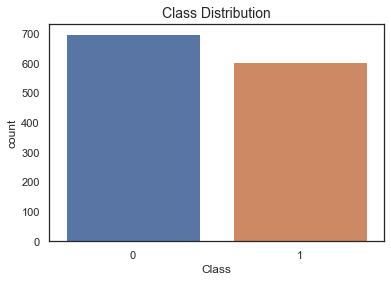

In [22]:
# Check to see the distribution between liked songs and disliked songs
sns.set(style = 'white')

sns.countplot('Class', data = combined_data)
plt.title('Class Distribution', fontsize = 14)

In [23]:
# Print how many songs belong in each class
num_liked = combined_data['Class'].value_counts()[1]
num_disliked = combined_data['Class'].value_counts()[0]

print('Number of liked Songs: ' + str(num_liked))
print('Number of disliked Songs: ' + str(num_disliked))

Number of liked Songs: 606
Number of disliked Songs: 698


Check the distribution of the different features in the dataset. By doing so I can identify which features I like in a song and which features I don't like

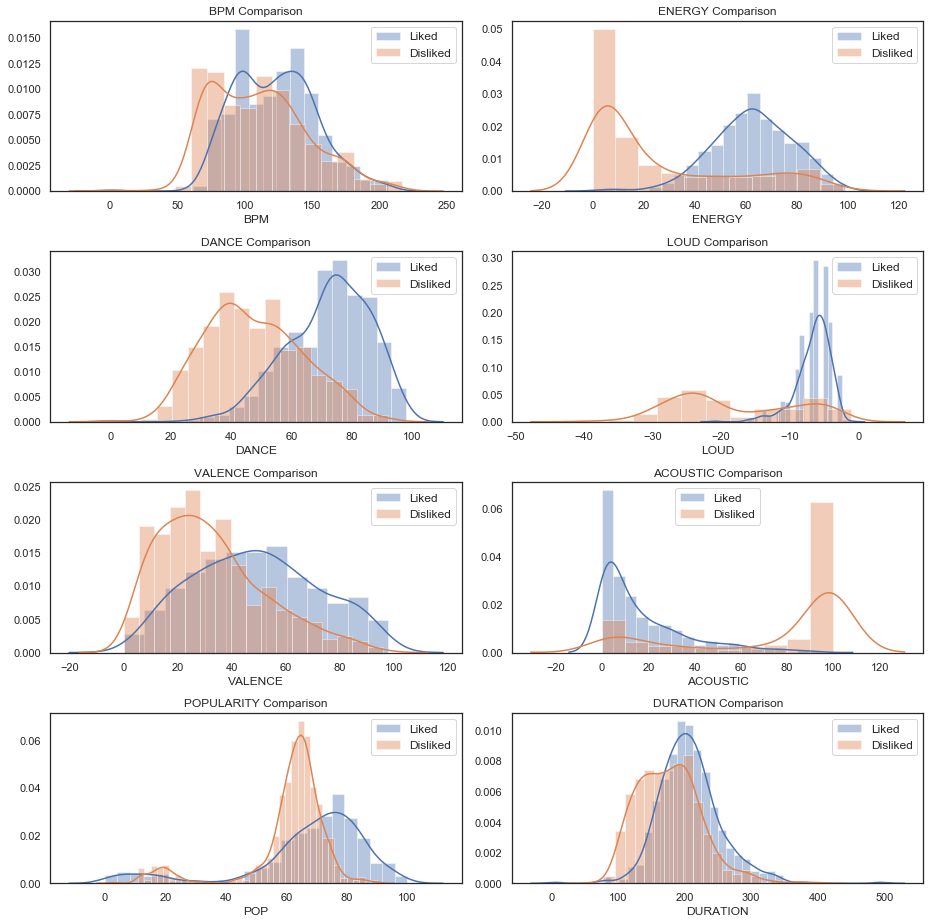

In [24]:
liked_songs = combined_data[combined_data['Class'] == 1]
disliked_songs = combined_data[combined_data['Class'] == 0]

plt.figure(figsize = (13,13))

# BPM (Beats Per Minute) Distribution plot
plt.subplot(421)
sns.distplot(liked_songs.BPM, label = 'Liked')
sns.distplot(disliked_songs.BPM, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('BPM Comparison')

# Energy Distribution plot
plt.subplot(422)
sns.distplot(liked_songs.ENERGY, label = 'Liked')
sns.distplot(disliked_songs.ENERGY, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('ENERGY Comparison')

# Dance Distribution plot
plt.subplot(423)
sns.distplot(liked_songs.DANCE, label = 'Liked')
sns.distplot(disliked_songs.DANCE, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('DANCE Comparison')

# Loudness Distribution plot
plt.subplot(424)
sns.distplot(liked_songs.LOUD, label = 'Liked')
sns.distplot(disliked_songs.LOUD, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('LOUD Comparison')

# Valence Distribution plot
plt.subplot(425)
sns.distplot(liked_songs.VALENCE, label = 'Liked')
sns.distplot(disliked_songs.VALENCE, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('VALENCE Comparison')

# Acoustic Distribution plot
plt.subplot(426)
sns.distplot(liked_songs.ACOUSTIC, label = 'Liked')
sns.distplot(disliked_songs.ACOUSTIC, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('ACOUSTIC Comparison')

# Popularity Distribution plot
plt.subplot(427)
sns.distplot(liked_songs.POP, label = 'Liked')
sns.distplot(disliked_songs.POP, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('POPULARITY Comparison')

# Song Duration Distribution plot
plt.subplot(428)
sns.distplot(liked_songs.DURATION, label = 'Liked')
sns.distplot(disliked_songs.DURATION, label = 'Disliked')
plt.legend(prop={'size': 12})
plt.title('DURATION Comparison')

plt.tight_layout()
plt.show()

C:\Users\zhika\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\zhika\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


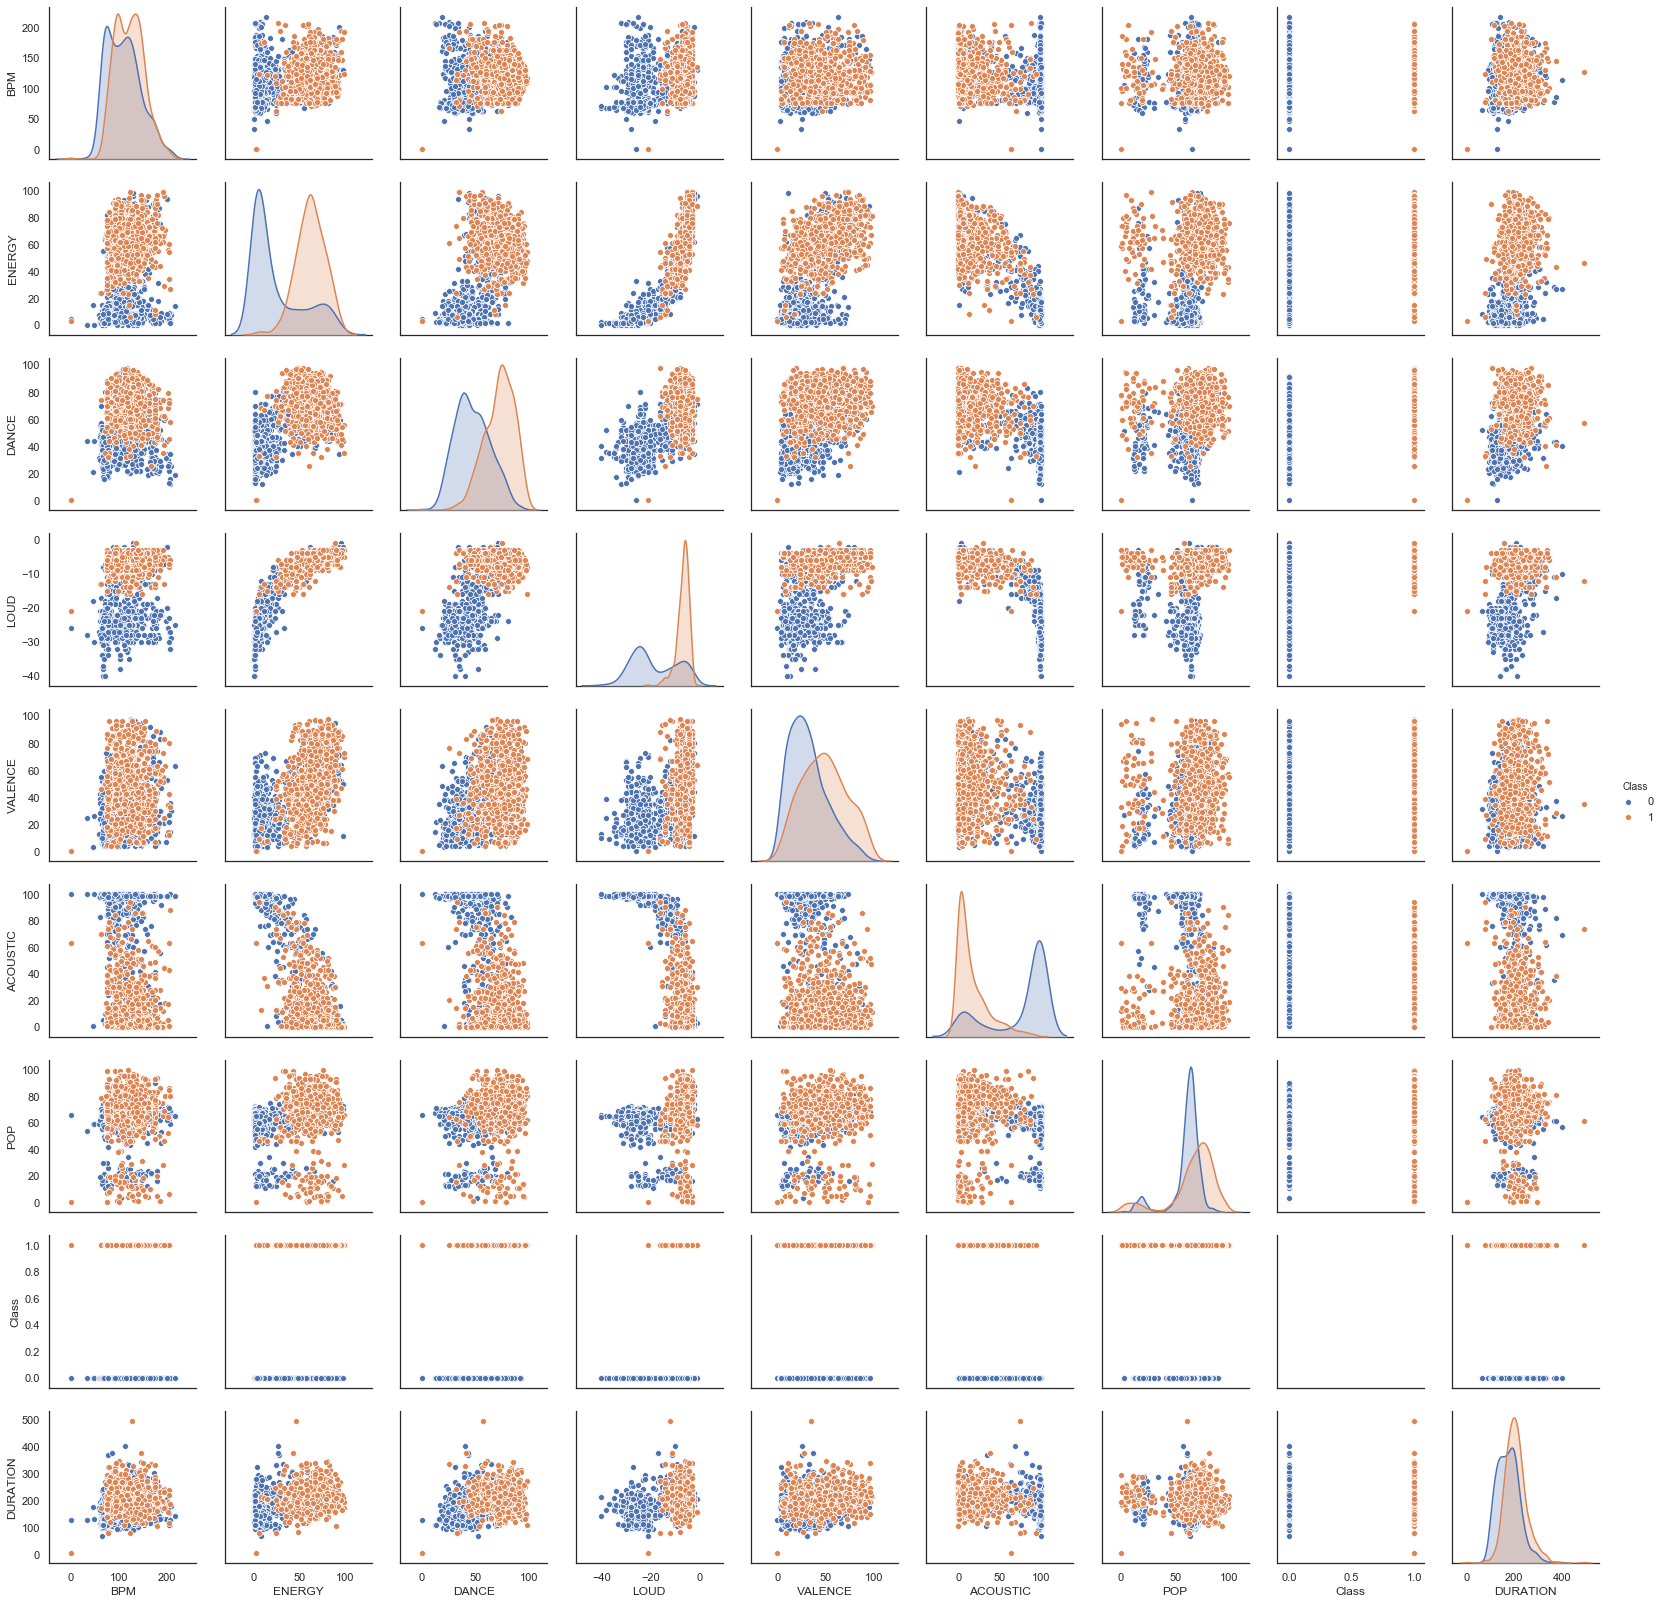

In [25]:
sns.pairplot(combined_data, hue = 'Class')

From these plots, it appears that I like songs that are louder, have high energy, are good dance music, and with less acoustic.

## Training Models

Before training the model with our data, we have to deal with the imbalance dataset

In [26]:
# Before training, deal with the imbalanced dataset
disliked_songs = disliked_songs.sample(len(liked_songs))
print(len(liked_songs))
print(len(disliked_songs))

606
606


In [28]:
balanced_data = pd.concat([liked_songs, disliked_songs], axis = 0)
balanced_data.sample(5)

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP,Class,DURATION
9,HIGHEST IN THE ROOM,Travis Scott,76,43,60,-9,6,5,99,1,176
265,Cloudy Waltz,Eric Cadogan,104,14,38,-24,40,99,67,0,121
607,Golden Embers,Mandolin Orange,119,17,65,-16,32,87,34,0,286
516,I Feel It Coming,The Weeknd,93,82,77,-6,59,43,72,1,269
721,Loaded,Lil Uzi Vert,143,44,82,-8,31,27,61,1,219


Text(0.5, 1.0, 'Class Distribution')

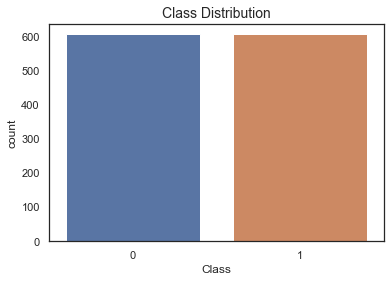

In [29]:
# Check to see the distribution between liked songs and disliked songs
sns.countplot('Class', data = balanced_data)
plt.title('Class Distribution', fontsize = 14)

Dataset is now balanced

In [30]:
# Split the dataset into training and test sets
y = balanced_data['Class']
x = balanced_data.drop(['TITLE', 'ARTIST', 'Class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

#### Random Forest

In [46]:
rf = RandomForestClassifier(max_depth = 10 , min_samples_leaf = 10, n_estimators = 100 )
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
rf_prec = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)
rf_auc_score = roc_auc_score(y_test, y_pred)


print('Accuracy of Random Forest Classifier: {:.2f}'.format(rf_acc))
print('Precision of Random Forest Classifier: {:.2f}'.format(rf_prec))
print('Recall Score of Random Forest Classifier: {:.2f}'.format(rf_recall))
print('F1 Score of Random Forest Classifier: {:.2f}'.format(rf_f1_score))
print('ROC AUC score on test set: {:.2f}'.format(rf_auc_score))

print('\nConfusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy of Random Forest Classifier: 0.88
Precision of Random Forest Classifier: 0.86
Recall Score of Random Forest Classifier: 0.93
F1 Score of Random Forest Classifier: 0.89
ROC AUC score on test set: 0.87

Confusion Matrix : 
[[109  25]
 [ 12 157]]


#### Support Vector Machine

In [39]:
svm = LinearSVC(C = 1.0, random_state = 0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred)
svm_auc_score = roc_auc_score(y_test, y_pred)


print('Accuracy of Support Vector Machine: {:.2f}'.format(svm_acc))
print('Precision of Support Vector Machine: {:.2f}'.format(svm_prec))
print('Recall Score of Support Vector Machine: {:.2f}'.format(svm_recall))
print('F1 Score of Support Vector Machine: {:.2f}'.format(svm_f1_score))
print('ROC AUC score on test set: {:.2f}'.format(svm_auc_score))

print('\nConfusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy of Support Vector Machine: 0.87
Precision of Support Vector Machine: 0.82
Recall Score of Support Vector Machine: 0.99
F1 Score of Support Vector Machine: 0.90
ROC AUC score on test set: 0.86

Confusion Matrix : 
[[ 97  37]
 [  2 167]]


C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

log_acc = accuracy_score(y_test, y_pred)
log_prec = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1_score = f1_score(y_test, y_pred)
log_auc_score = roc_auc_score(y_test, y_pred)


print('Accuracy of Logistic Regression: {:.2f}'.format(log_acc))
print('Precision of Logistic Regression: {:.2f}'.format(log_prec))
print('Recall Score of Logistic Regression: {:.2f}'.format(log_recall))
print('F1 Score of Logistic Regression: {:.2f}'.format(log_f1_score))
print('ROC AUC score on test set: {:.2f}'.format(log_auc_score))

print('\nConfusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy of Logistic Regression: 0.86
Precision of Logistic Regression: 0.86
Recall Score of Logistic Regression: 0.91
F1 Score of Logistic Regression: 0.88
ROC AUC score on test set: 0.86

Confusion Matrix : 
[[108  26]
 [ 15 154]]


C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### XGBoost

In [41]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred)
xgb_prec = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred)
xgb_auc_score = roc_auc_score(y_test, y_pred)


print('Accuracy of XGBoost: {:.2f}'.format(xgb_acc))
print('Precision of XGBoost: {:.2f}'.format(xgb_prec))
print('Recall Score of XGBoost: {:.2f}'.format(xgb_recall))
print('F1 Score of XGBoost: {:.2f}'.format(xgb_f1_score))
print('ROC AUC score on test set: {:.2f}'.format(xgb_auc_score))

print('\nConfusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy of XGBoost: 0.88
Precision of XGBoost: 0.88
Recall Score of XGBoost: 0.91
F1 Score of XGBoost: 0.89
ROC AUC score on test set: 0.87

Confusion Matrix : 
[[112  22]
 [ 15 154]]


#### Results

In [42]:
data = [['Random Forest', rf_acc, rf_prec, rf_recall, rf_f1_score, rf_auc_score], 
        ['Support Vector Machine', svm_acc, svm_prec, svm_recall, svm_f1_score, svm_auc_score], 
        ['Logistic Regression', log_acc, log_prec, log_recall, log_f1_score, log_auc_score],
       ['XGBoost', xgb_acc, xgb_prec, xgb_recall, xgb_f1_score, xgb_auc_score]] 
  
# Create the pandas DataFrame 
results = pd.DataFrame(data, columns = ['Model', 'Accuracy', 'Precision', 'Recall Score', 'F1 Score', 'Area Under Curve']) 
# print dataframe. 
results

,Model,Accuracy,Precision,Recall Score,F1 Score,Area Under Curve
0,Random Forest,0.871287,0.857143,0.923077,0.888889,0.864524
1,Support Vector Machine,0.871287,0.818627,0.988166,0.895442,0.856023
2,Logistic Regression,0.864686,0.855556,0.911243,0.882521,0.858606
3,XGBoost,0.877888,0.875000,0.911243,0.892754,0.873532


## Hyperparameter Tuning

#### Random Forest

In [50]:
#Grid Search
rf = RandomForestClassifier()
grid_values = {'max_depth': [10,20],'min_samples_leaf':[10,20], 'n_estimators': [5,10,50,100] }
rf_grid = GridSearchCV(rf, param_grid = grid_values,scoring = 'recall')
rf_grid.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_grid = rf_grid.predict(X_test)

rf_grid_acc = accuracy_score(y_test, y_pred_grid)
rf_grid_prec = precision_score(y_test, y_pred_grid)
rf_grid_recall = recall_score(y_test, y_pred_grid)
rf_grid_f1_score = f1_score(y_test, y_pred_grid)
rf_grid_auc_score = roc_auc_score(y_test, y_pred_grid)


print('Accuracy of Random Forest Classifier after Parameter Tuning: {:.2f}'.format(rf_grid_acc))
print('Precision of Random Forest Classifier after Parameter Tuning: {:.2f}'.format(rf_grid_prec))
print('Recall Score of Random Forest Classifier after Parameter Tuning: {:.2f}'.format(rf_grid_recall))
print('F1 Score of Random Forest Classifier after Parameter Tuning: {:.2f}'.format(rf_grid_f1_score))
print('ROC AUC score on test set after Parameter Tuning: {:.2f}'.format(rf_grid_auc_score))

print('\nConfusion Matrix after Parameter Tuning : \n' + str(confusion_matrix(y_test,y_pred_grid)))

C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of Random Forest Classifier after Parameter Tuning: 0.88
Precision of Random Forest Classifier after Parameter Tuning: 0.86
Recall Score of Random Forest Classifier after Parameter Tuning: 0.95
F1 Score of Random Forest Classifier after Parameter Tuning: 0.90
ROC AUC score on test set after Parameter Tuning: 0.88

Confusion Matrix after Parameter Tuning : 
[[107  27]
 [  8 161]]


#### Support Vector Machine

In [45]:
#Grid Search
svm = LinearSVC()
grid_values = {"C": np.power(5.0, np.arange(-3,3))}
svm_grid = GridSearchCV(svm, param_grid = grid_values,scoring = 'precision')
svm_grid.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_grid = svm_grid.predict(X_test)

svm_grid_acc = accuracy_score(y_test, y_pred_grid)
svm_grid_prec = precision_score(y_test, y_pred_grid)
svm_grid_recall = recall_score(y_test, y_pred_grid)
svm_grid_f1_score = f1_score(y_test, y_pred_grid)
svm_grid_auc_score = roc_auc_score(y_test, y_pred_grid)


print('Accuracy of Support Vector Machine after Parameter Tuning: {:.2f}'.format(svm_grid_acc))
print('Precision of Support Vector Machine after Parameter Tuning: {:.2f}'.format(svm_grid_prec))
print('Recall Score of Support Vector Machine after Parameter Tuning: {:.2f}'.format(svm_grid_recall))
print('F1 Score of Support Vector Machine after Parameter Tuning: {:.2f}'.format(svm_grid_f1_score))
print('ROC AUC score on test set after Parameter Tuning: {:.2f}'.format(svm_grid_auc_score))

print('\nConfusion Matrix after Parameter Tuning : \n' + str(confusion_matrix(y_test,y_pred_grid)))

C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the numb

Accuracy of Support Vector Machine after Parameter Tuning: 0.82
Precision of Support Vector Machine after Parameter Tuning: 0.76
Recall Score of Support Vector Machine after Parameter Tuning: 0.99
F1 Score of Support Vector Machine after Parameter Tuning: 0.86
ROC AUC score on test set after Parameter Tuning: 0.80

Confusion Matrix after Parameter Tuning : 
[[ 81  53]
 [  2 167]]


C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\zhika\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Logistic Regression

In [ ]:
#Grid Search
log = LogisticRegression()
grid_values = {"C": np.power(5.0, np.arange(-3,3))}
log_grid = GridSearchCV(log, param_grid = grid_values,scoring = 'precision')
log_grid.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_grid = log_grid.predict(X_test)

log_grid_acc = accuracy_score(y_test, y_pred_grid)
log_grid_prec = precision_score(y_test, y_pred_grid)
log_grid_recall = recall_score(y_test, y_pred_grid)
log_grid_f1_score = f1_score(y_test, y_pred_grid)
log_grid_auc_score = roc_auc_score(y_test, y_pred_grid)


print('Accuracy of Logistic Regression after Parameter Tuning: {:.2f}'.format(rf_grid_acc))
print('Precision of Logistic Regression after Parameter Tuning: {:.2f}'.format(rf_grid_prec))
print('Recall Score of Logistic Regression after Parameter Tuning: {:.2f}'.format(rf_grid_recall))
print('F1 Score of Logistic Regression after Parameter Tuning: {:.2f}'.format(rf_grid_f1_score))
print('ROC AUC score on test set after Parameter Tuning: {:.2f}'.format(rf_grid_auc_score))

print('\nConfusion Matrix after Parameter Tuning : \n' + str(confusion_matrix(y_test,y_pred_grid)))